In [1]:
#import netCDF4 as nc

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D   
import pickle

from skimage.metrics import structural_similarity as ssim

from mpl_toolkits.axes_grid1 import make_axes_locatable

#import cv2

from scipy import interpolate

import cartopy.crs as ccrs

from matplotlib.gridspec import GridSpec


#from mpl_toolkits.basemap import Basemap

import time

from matplotlib import rcParams

rcParams['ps.useafm'] = True
rcParams['pdf.use14corefonts'] = False
rcParams['text.usetex'] = False
rcParams['font.sans-serif'] = ['cmr10', 'Times-Roman']
rcParams['font.weight'] = 'normal'
rcParams['font.size'] = 20
rcParams['xtick.labelsize'] = 20
rcParams['ytick.labelsize'] = 20
rcParams['axes.labelsize'] = 22
rcParams['axes.linewidth'] = 1
rcParams['axes.unicode_minus'] = False
rcParams['xtick.minor.width'] = 1
rcParams['ytick.minor.width'] = 1
rcParams['xtick.major.width'] = 1
rcParams['ytick.major.width'] = 1
rcParams['xtick.minor.size'] = 4
rcParams['ytick.minor.size'] = 4
rcParams['xtick.major.size'] = 5
rcParams['ytick.major.size'] = 5
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['mathtext.fontset'] = 'cm'

rcParams['image.cmap'] = plt.cm.Dark2 #'coolwarm'



In [2]:
def rmse(xp,yp, xt,yt):
    return np.sqrt(((xp - xt)**2+(yp - yt)**2).mean())

def rmse_local(xp,yp, xt,yt):
    return np.sqrt(((xp - xt)**2+(yp - yt)**2))


# Interpolation plot


In [3]:
rmse_u_lin=np.load('errdata/rmse_u_lin.npy')
rmse_u_nn4=np.load('errdata/rmse_u_nn4.npy')
rmse_u_nn2=np.load('errdata/rmse_u_nn2.npy')
rmse_u_nn1=np.load('errdata/rmse_u_nn1.npy')

rmse_v_lin=np.load('errdata/rmse_v_lin.npy')
rmse_v_nn4=np.load('errdata/rmse_v_nn4.npy')
rmse_v_nn2=np.load('errdata/rmse_v_nn2.npy')
rmse_v_nn1=np.load('errdata/rmse_v_nn1.npy')

ssim_u_lin=np.load('errdata/ssim_u_lin.npy')
ssim_u_nn4=np.load('errdata/ssim_u_nn4.npy')
ssim_u_nn2=np.load('errdata/ssim_u_nn2.npy')
ssim_u_nn1=np.load('errdata/ssim_u_nn1.npy')

ssim_v_lin=np.load('errdata/ssim_v_lin.npy')
ssim_v_nn4=np.load('errdata/ssim_v_nn4.npy')
ssim_v_nn2=np.load('errdata/ssim_v_nn2.npy')
ssim_v_nn1=np.load('errdata/ssim_v_nn1.npy')


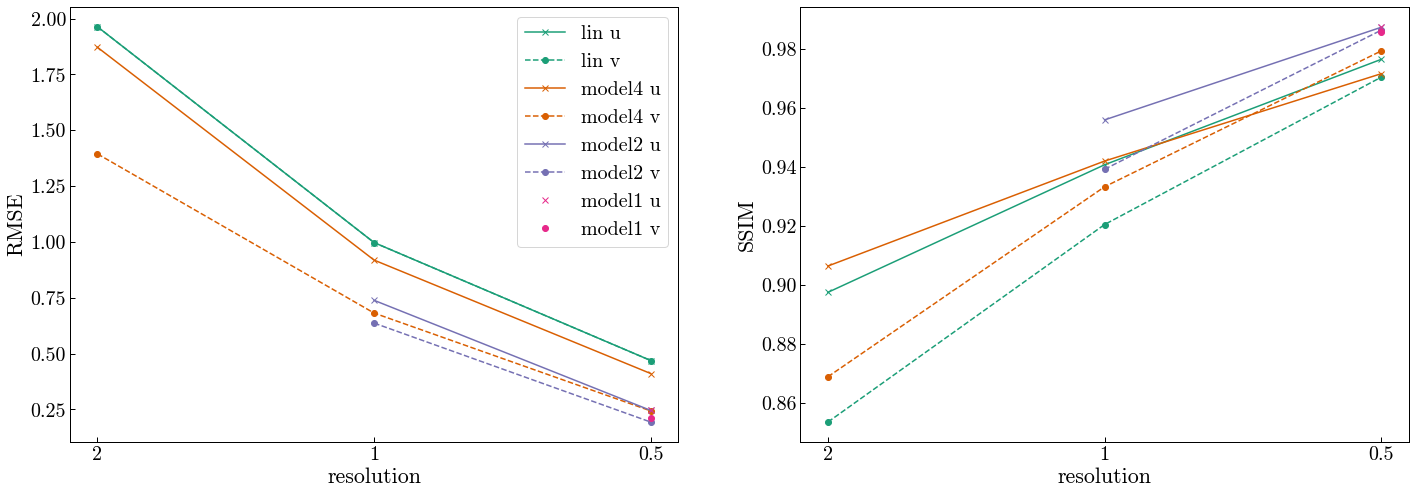

In [4]:
plt.figure(figsize=(24,8))

cmap = mpl.cm.get_cmap('Dark2', 16)
#cmap = mpl.cm.get_cmap('gist_earth', 16)


x4=np.array([0,1,2])
x2=np.array([1,2])
x1=np.array([2])

plt.subplot(1,2,1)
plt.plot(x4,rmse_u_lin,'-x',label='lin u',c=cmap(0))
plt.plot(x4,rmse_u_lin,'--o',label='lin v',c=cmap(1))

plt.plot(x4,rmse_u_nn4,'-x',label='model4 u',c=cmap(2))
plt.plot(x4,rmse_v_nn4,'--o',label='model4 v',c=cmap(3))

plt.plot(x2,rmse_u_nn2,'-x',label='model2 u',c=cmap(4))
plt.plot(x2,rmse_v_nn2,'--o',label='model2 v',c=cmap(5))

plt.plot(x1,rmse_u_nn1,'x',label='model1 u',c=cmap(6))
plt.plot(x1,rmse_v_nn1,'o',label='model1 v',c=cmap(7))

plt.legend(loc=1)
plt.xlabel('resolution')
plt.ylabel('RMSE')
plt.xticks([0,1,2], labels=['2','1','0.5'])



plt.subplot(1,2,2)

plt.plot(x4,ssim_u_lin,'-x',label='lin u',c=cmap(0))
plt.plot(x4,ssim_v_lin,'--o',label='lin v',c=cmap(1))

plt.plot(x4,ssim_u_nn4,'-x',label='model4 u',c=cmap(2))
plt.plot(x4,ssim_v_nn4,'--o',label='model4 v',c=cmap(3))

plt.plot(x2,ssim_u_nn2,'-x',label='model2 u',c=cmap(4))
plt.plot(x2,ssim_v_nn2,'--o',label='model2 v',c=cmap(5))

plt.plot(x1,ssim_u_nn1,'x',label='model1 u',c=cmap(6))
plt.plot(x1,ssim_v_nn1,'o',label='model1 v',c=cmap(7))

plt.xticks([0,1,2], labels=['2','1','0.5'])
plt.xlabel('resolution')
plt.ylabel('SSIM')

plt.savefig('interpolation_models.pdf',bbox_inches = 'tight') 

# One time upscaling

In [5]:
uref=np.load('data1/uref.npy')
vref=np.load('data1/vref.npy')
ulin=np.load('data1/ulin.npy')
vlin=np.load('data1/vlin.npy')
unn=np.load('data1/unn.npy')
vnn=np.load('data1/vnn.npy')

In [6]:
umi=np.zeros(4)
uma=np.zeros(4)
umi[0] = abs(ulin[0,]-uref[0,]).min()
uma[0] = abs(ulin[0,]-uref[0,]).max()
umi[1] = abs(ulin[1,]-uref[1,]).min()
uma[1] = abs(ulin[1,]-uref[1,]).max()
umi[2] = abs(ulin[2,]-uref[2,]).min()
uma[2] = abs(ulin[2,]-uref[2,]).max()
umi[3] = abs(ulin[3,]-uref[3,]).min()
uma[3] = abs(ulin[3,]-uref[3,]).max()

In [7]:
e_lin=rmse_local(ulin,vlin,uref,vref)
e_nn=rmse_local(unn,vnn,uref,vref)



umi=np.zeros(4)
uma=np.zeros(4)
umi[0] = e_lin[0,].min()
uma[0] = e_lin[0,].max()
umi[1] = e_lin[1,].min()
uma[1] = e_lin[1,].max()
umi[2] = e_lin[2,].min()
uma[2] = e_lin[2,].max()
umi[3] = e_lin[3,].min()
uma[3] = e_lin[3,].max()

e_lin_all=rmse(ulin,vlin,uref,vref)
e_nn_all=rmse(unn,vnn,uref,vref)


tt=1

err_nn=np.sqrt((uref[tt,]-unn[tt,])**2+(vref[tt,]-vnn[tt,])**2)
err_lin=np.sqrt((uref[tt,]-ulin[tt,])**2+(vref[tt,]-vlin[tt,])**2)

max_err=err_nn.max()
print(max_err)



bins=int(max_err+1)

h_lin=np.zeros((bins,1))
h_nn=np.zeros((bins,1))

a_nn=err_nn.flatten()
a_lin=err_lin.flatten()
for i in range(bins):
    test=np.where((a_lin >= i) & (a_lin <=i+1))
    h_lin[i]=len(test[0])
    
    test=np.where((a_nn >= i) & (a_nn <=i+1))
    h_nn[i]=len(test[0])
    


10.4328785


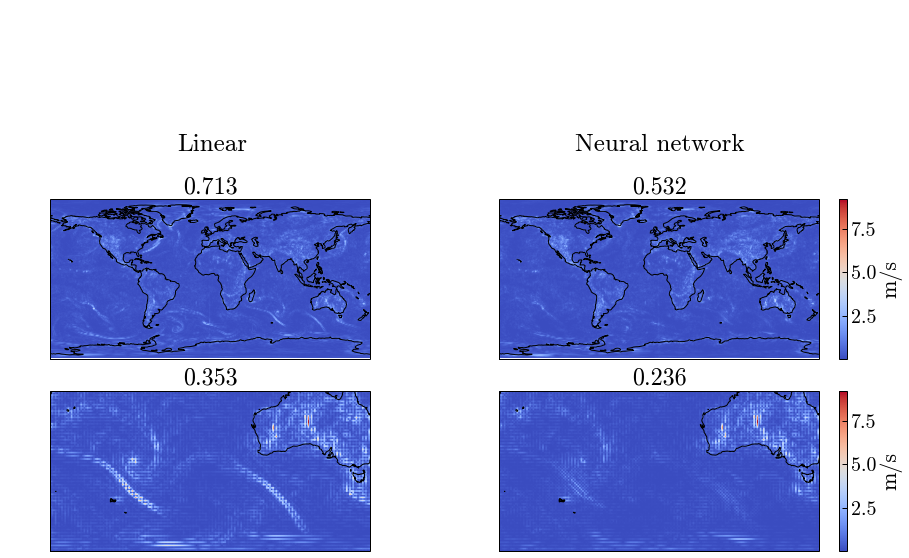

In [8]:
mon=0

fig=plt.figure(figsize=(16,10))

gs=GridSpec(3,2) # 2 rows, 3 columns

ax0=fig.add_subplot(gs[0,0]) # First row, first column
ax0.text(0.42,0.1,'Linear',fontsize=25)
ax0.axis('off')

ax0=fig.add_subplot(gs[0,1]) # First row, second column
ax0.text(0.2,0.1,'Neural network', fontsize=25)
ax0.axis('off')

ax1=fig.add_subplot(gs[1,0],projection=ccrs.PlateCarree()) 
ax1.coastlines()
#ax1.imshow(e_lin[mon,], vmin=umi[mon], vmax=uma[mon],cmap ="coolwarm",origin='lower',extent=[-180,180,-90,90])
ax1.imshow(e_lin[mon,], cmap ="coolwarm",origin='lower',extent=[0,360,-90,90])
ax1.set_title(str(round(rmse(ulin[mon,],vlin[mon,],uref[mon,],vref[mon,]),3)))

ax2=fig.add_subplot(gs[1,1],projection=ccrs.PlateCarree()) 
ax2.coastlines()
#im=ax2.imshow(e_nn[mon,], vmin=umi[mon], vmax=uma[mon],cmap ="Reds",origin='lower',extent=[-180,180,-90,90])
im=ax2.imshow(e_nn[mon,],cmap ="coolwarm",origin='lower',extent=[0,360,-90,90])

ax2.set_title(str(round(rmse(unn[mon,],vnn[mon,],uref[mon,],vref[mon,]),3)))
plt.colorbar(im,label="m/s")

###
x0=50
x1=150
y0=100
y1=300

ex0=(y0/2) #(y0/2-180)
ex1=(y1/2) #(y1/2-180)
ex2=(x0/2-90)
ex3=(x1/2-90)

umi=np.zeros(4)
uma=np.zeros(4)
umi[0] = e_lin[0,x0:x1,y0:y1].min()
uma[0] = e_lin[0,x0:x1,y0:y1].max()
umi[1] = e_lin[1,x0:x1,y0:y1].min()
uma[1] = e_lin[1,x0:x1,y0:y1].max()
umi[2] = e_lin[2,x0:x1,y0:y1].min()
uma[2] = e_lin[2,x0:x1,y0:y1].max()
umi[3] = e_lin[3,x0:x1,y0:y1].min()
uma[3] = e_lin[3,x0:x1,y0:y1].max()
###

ax1=fig.add_subplot(gs[2,0],projection=ccrs.PlateCarree()) 
ax1.coastlines()
#ax1.imshow(e_lin[mon,x0:x1,y0:y1], vmin=umi[mon], vmax=uma[mon],cmap ="Reds",origin='lower',extent=[ex0,ex1,ex2,ex3],transform=ccrs.PlateCarree())
ax1.imshow(e_lin[mon,x0:x1,y0:y1],cmap ="coolwarm",origin='lower',extent=[ex0,ex1,ex2,ex3],transform=ccrs.PlateCarree())
ax1.set_title(str(round(np.mean(e_lin[mon,x0:x1,y0:y1]),3)))

ax2=fig.add_subplot(gs[2,1],projection=ccrs.PlateCarree()) 
ax2.coastlines()
#im=ax2.imshow(e_nn[mon,x0:x1,y0:y1,], vmin=umi[mon], vmax=uma[mon],cmap ="Reds",origin='lower',extent=[ex0,ex1,ex2,ex3],transform=ccrs.PlateCarree())
im=ax2.imshow(e_nn[mon,x0:x1,y0:y1,],cmap ="coolwarm",origin='lower',extent=[ex0,ex1,ex2,ex3],transform=ccrs.PlateCarree())
ax2.set_title(str(round(np.mean(e_nn[mon,x0:x1,y0:y1]),3)))
plt.colorbar(im,label="m/s")

plt.savefig('error_1.pdf',bbox_inches = 'tight')

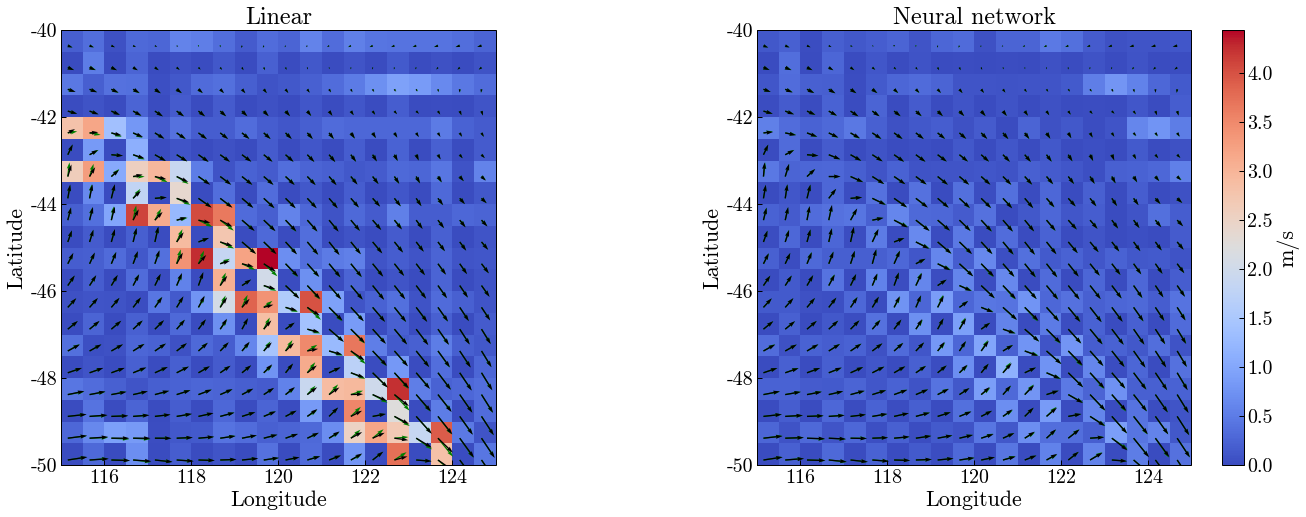

In [9]:
x=np.linspace(-90,90,360)
y=np.linspace(0,360,720)
X,Y=np.meshgrid(y,x)

x0=80
x1=100
y0=230
y1=250

umi=np.zeros(4)
uma=np.zeros(4)
umi[0] = e_lin[0,x0:x1,y0:y1].min()
uma[0] = e_lin[0,x0:x1,y0:y1].max()
umi[1] = e_lin[1,x0:x1,y0:y1].min()
uma[1] = e_lin[1,x0:x1,y0:y1].max()
umi[2] = e_lin[2,x0:x1,y0:y1].min()
uma[2] = e_lin[2,x0:x1,y0:y1].max()
umi[3] = e_lin[3,x0:x1,y0:y1].min()
uma[3] = e_lin[3,x0:x1,y0:y1].max()

ex0=(y0/2)
ex1=(y1/2)
ex2=(x0/2-90)
ex3=(x1/2-90)

plt.figure(figsize=(24,8))

ax1=plt.subplot(1,2,1,projection=ccrs.PlateCarree())
ax1.coastlines()
ax1.imshow(e_lin[mon,x0:x1,y0:y1], vmin=umi[mon], vmax=uma[mon],cmap ="coolwarm",origin='lower',extent=[ex0,ex1,ex2,ex3],transform=ccrs.PlateCarree())
ax1.quiver(X[x0:x1,y0:y1],Y[x0:x1,y0:y1],uref[mon,x0:x1,y0:y1],vref[mon,x0:x1,y0:y1],color='green')
ax1.quiver(X[x0:x1,y0:y1],Y[x0:x1,y0:y1],ulin[mon,x0:x1,y0:y1],vlin[mon,x0:x1,y0:y1])
ax1.set_title('Linear')
ax1.axes.get_yaxis().set_visible(True)
ax1.axes.get_xaxis().set_visible(True)
ax1.set_ylabel('Latitude')
ax1.set_xlabel('Longitude')

ax2=plt.subplot(1,2,2,projection=ccrs.PlateCarree())
ax2.coastlines()
im=ax2.imshow(e_nn[mon,x0:x1,y0:y1,], vmin=umi[mon], vmax=uma[mon],cmap ="coolwarm",origin='lower',extent=[ex0,ex1,ex2,ex3],transform=ccrs.PlateCarree())
ax2.quiver(X[x0:x1,y0:y1],Y[x0:x1,y0:y1],uref[mon,x0:x1,y0:y1],vref[mon,x0:x1,y0:y1],color='green')    
ax2.quiver(X[x0:x1,y0:y1],Y[x0:x1,y0:y1],unn[mon,x0:x1,y0:y1],vnn[mon,x0:x1,y0:y1])
ax2.set_title('Neural network')

ax2.axes.get_yaxis().set_visible(True)
ax2.axes.get_xaxis().set_visible(True)
ax2.set_ylabel('Latitude')
ax2.set_xlabel('Longitude')

plt.colorbar(im,label="m/s")

plt.savefig('error_vec_1.pdf',bbox_inches = 'tight')

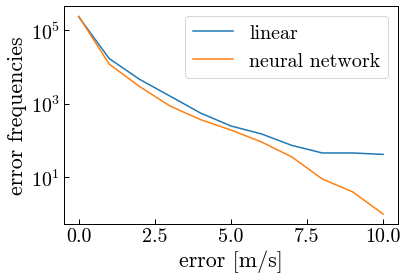

In [10]:
plt.plot(h_lin,label='linear')
plt.plot(h_nn,label='neural network')
plt.yscale('log')
plt.legend()
plt.ylabel('error frequencies')
plt.xlabel('error [m/s]')
plt.savefig('higherr.pdf',bbox_inches = 'tight')        

# Multiple time upscaling

In [11]:
uref=np.load('data2/uref.npy')
vref=np.load('data2/vref.npy')
ulin=np.load('data2/ulin.npy')
vlin=np.load('data2/vlin.npy')
unn=np.load('data2/unn.npy')
vnn=np.load('data2/vnn.npy')

In [12]:
umi=np.zeros(4)
uma=np.zeros(4)
umi[0] = abs(ulin[0,]-uref[0,]).min()
uma[0] = abs(ulin[0,]-uref[0,]).max()
umi[1] = abs(ulin[1,]-uref[1,]).min()
uma[1] = abs(ulin[1,]-uref[1,]).max()
umi[2] = abs(ulin[2,]-uref[2,]).min()
uma[2] = abs(ulin[2,]-uref[2,]).max()
umi[3] = abs(ulin[3,]-uref[3,]).min()
uma[3] = abs(ulin[3,]-uref[3,]).max()

In [13]:
e_lin=rmse_local(ulin,vlin,uref,vref)
e_nn=rmse_local(unn,vnn,uref,vref)



umi=np.zeros(4)
uma=np.zeros(4)
umi[0] = e_lin[0,].min()
uma[0] = e_lin[0,].max()
umi[1] = e_lin[1,].min()
uma[1] = e_lin[1,].max()
umi[2] = e_lin[2,].min()
uma[2] = e_lin[2,].max()
umi[3] = e_lin[3,].min()
uma[3] = e_lin[3,].max()

e_lin_all=rmse(ulin,vlin,uref,vref)
e_nn_all=rmse(unn,vnn,uref,vref)


tt=1

err_nn=np.sqrt((uref[tt,]-unn[tt,])**2+(vref[tt,]-vnn[tt,])**2)
err_lin=np.sqrt((uref[tt,]-ulin[tt,])**2+(vref[tt,]-vlin[tt,])**2)

max_err=err_nn.max()
print(max_err)



bins=int(max_err+1)

h_lin=np.zeros((bins,1))
h_nn=np.zeros((bins,1))

a_nn=err_nn.flatten()
a_lin=err_lin.flatten()
for i in range(bins):
    test=np.where((a_lin >= i) & (a_lin <=i+1))
    h_lin[i]=len(test[0])
    
    test=np.where((a_nn >= i) & (a_nn <=i+1))
    h_nn[i]=len(test[0])
    


18.944988


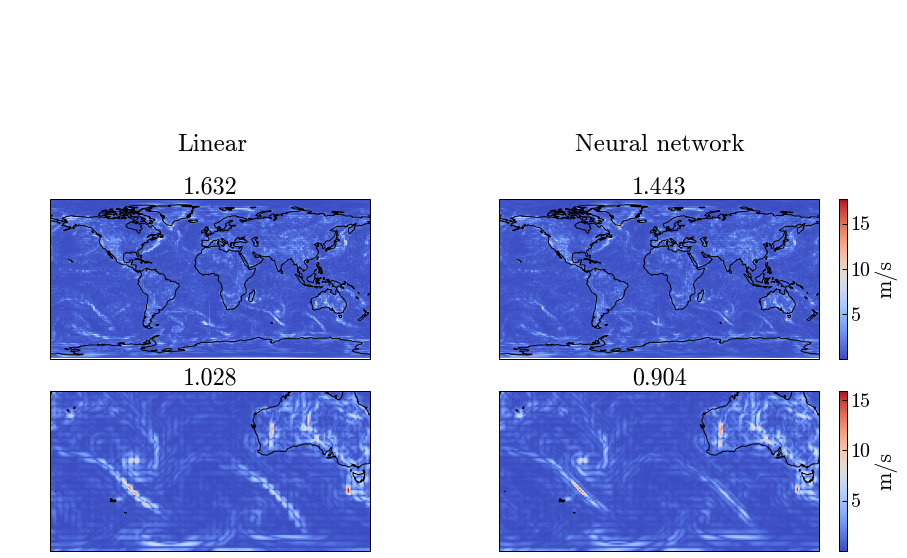

In [14]:
mon=0

fig=plt.figure(figsize=(16,10))

gs=GridSpec(3,2) # 2 rows, 3 columns

ax0=fig.add_subplot(gs[0,0]) # First row, first column
ax0.text(0.42,0.1,'Linear',fontsize=25)
ax0.axis('off')

ax0=fig.add_subplot(gs[0,1]) # First row, second column
ax0.text(0.2,0.1,'Neural network', fontsize=25)
ax0.axis('off')

ax1=fig.add_subplot(gs[1,0],projection=ccrs.PlateCarree()) 
ax1.coastlines()
#ax1.imshow(e_lin[mon,], vmin=umi[mon], vmax=uma[mon],cmap ="coolwarm",origin='lower',extent=[-180,180,-90,90])
ax1.imshow(e_lin[mon,], cmap ="coolwarm",origin='lower',extent=[0,360,-90,90])
ax1.set_title(str(round(rmse(ulin[mon,],vlin[mon,],uref[mon,],vref[mon,]),3)))

ax2=fig.add_subplot(gs[1,1],projection=ccrs.PlateCarree()) 
ax2.coastlines()
#im=ax2.imshow(e_nn[mon,], vmin=umi[mon], vmax=uma[mon],cmap ="Reds",origin='lower',extent=[-180,180,-90,90])
im=ax2.imshow(e_nn[mon,],cmap ="coolwarm",origin='lower',extent=[0,360,-90,90])

ax2.set_title(str(round(rmse(unn[mon,],vnn[mon,],uref[mon,],vref[mon,]),3)))
plt.colorbar(im,label="m/s")

###
x0=50
x1=150
y0=100
y1=300

ex0=(y0/2) #(y0/2-180)
ex1=(y1/2) #(y1/2-180)
ex2=(x0/2-90)
ex3=(x1/2-90)

umi=np.zeros(4)
uma=np.zeros(4)
umi[0] = e_lin[0,x0:x1,y0:y1].min()
uma[0] = e_lin[0,x0:x1,y0:y1].max()
umi[1] = e_lin[1,x0:x1,y0:y1].min()
uma[1] = e_lin[1,x0:x1,y0:y1].max()
umi[2] = e_lin[2,x0:x1,y0:y1].min()
uma[2] = e_lin[2,x0:x1,y0:y1].max()
umi[3] = e_lin[3,x0:x1,y0:y1].min()
uma[3] = e_lin[3,x0:x1,y0:y1].max()
###

ax1=fig.add_subplot(gs[2,0],projection=ccrs.PlateCarree()) 
ax1.coastlines()
#ax1.imshow(e_lin[mon,x0:x1,y0:y1], vmin=umi[mon], vmax=uma[mon],cmap ="Reds",origin='lower',extent=[ex0,ex1,ex2,ex3],transform=ccrs.PlateCarree())
ax1.imshow(e_lin[mon,x0:x1,y0:y1],cmap ="coolwarm",origin='lower',extent=[ex0,ex1,ex2,ex3],transform=ccrs.PlateCarree())
ax1.set_title(str(round(np.mean(e_lin[mon,x0:x1,y0:y1]),3)))

ax2=fig.add_subplot(gs[2,1],projection=ccrs.PlateCarree()) 
ax2.coastlines()
#im=ax2.imshow(e_nn[mon,x0:x1,y0:y1,], vmin=umi[mon], vmax=uma[mon],cmap ="Reds",origin='lower',extent=[ex0,ex1,ex2,ex3],transform=ccrs.PlateCarree())
im=ax2.imshow(e_nn[mon,x0:x1,y0:y1,],cmap ="coolwarm",origin='lower',extent=[ex0,ex1,ex2,ex3],transform=ccrs.PlateCarree())
ax2.set_title(str(round(np.mean(e_nn[mon,x0:x1,y0:y1]),3)))
plt.colorbar(im,label="m/s")

plt.savefig('error_2.pdf',bbox_inches = 'tight')

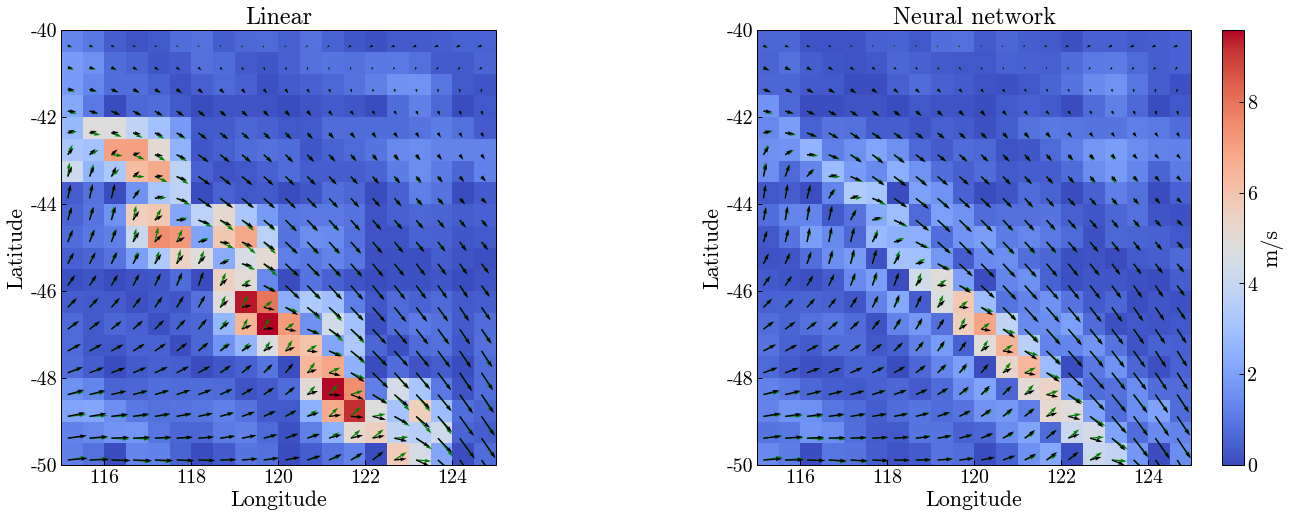

In [15]:
x=np.linspace(-90,90,360)
y=np.linspace(0,360,720)
X,Y=np.meshgrid(y,x)

x0=80
x1=100
y0=230
y1=250

umi=np.zeros(4)
uma=np.zeros(4)
umi[0] = e_lin[0,x0:x1,y0:y1].min()
uma[0] = e_lin[0,x0:x1,y0:y1].max()
umi[1] = e_lin[1,x0:x1,y0:y1].min()
uma[1] = e_lin[1,x0:x1,y0:y1].max()
umi[2] = e_lin[2,x0:x1,y0:y1].min()
uma[2] = e_lin[2,x0:x1,y0:y1].max()
umi[3] = e_lin[3,x0:x1,y0:y1].min()
uma[3] = e_lin[3,x0:x1,y0:y1].max()

ex0=(y0/2)
ex1=(y1/2)
ex2=(x0/2-90)
ex3=(x1/2-90)

plt.figure(figsize=(24,8))

ax1=plt.subplot(1,2,1,projection=ccrs.PlateCarree())
ax1.coastlines()
ax1.imshow(e_lin[mon,x0:x1,y0:y1], vmin=umi[mon], vmax=uma[mon],cmap ="coolwarm",origin='lower',extent=[ex0,ex1,ex2,ex3],transform=ccrs.PlateCarree())
ax1.quiver(X[x0:x1,y0:y1],Y[x0:x1,y0:y1],uref[mon,x0:x1,y0:y1],vref[mon,x0:x1,y0:y1],color='green')
ax1.quiver(X[x0:x1,y0:y1],Y[x0:x1,y0:y1],ulin[mon,x0:x1,y0:y1],vlin[mon,x0:x1,y0:y1])
ax1.set_title('Linear')
ax1.axes.get_yaxis().set_visible(True)
ax1.axes.get_xaxis().set_visible(True)
ax1.set_ylabel('Latitude')
ax1.set_xlabel('Longitude')

ax2=plt.subplot(1,2,2,projection=ccrs.PlateCarree())
ax2.coastlines()
im=ax2.imshow(e_nn[mon,x0:x1,y0:y1,], vmin=umi[mon], vmax=uma[mon],cmap ="coolwarm",origin='lower',extent=[ex0,ex1,ex2,ex3],transform=ccrs.PlateCarree())
ax2.quiver(X[x0:x1,y0:y1],Y[x0:x1,y0:y1],uref[mon,x0:x1,y0:y1],vref[mon,x0:x1,y0:y1],color='green')    
ax2.quiver(X[x0:x1,y0:y1],Y[x0:x1,y0:y1],unn[mon,x0:x1,y0:y1],vnn[mon,x0:x1,y0:y1])
ax2.set_title('Neural network')

ax2.axes.get_yaxis().set_visible(True)
ax2.axes.get_xaxis().set_visible(True)
ax2.set_ylabel('Latitude')
ax2.set_xlabel('Longitude')

plt.colorbar(im,label="m/s")

plt.savefig('error_vec_2.pdf',bbox_inches = 'tight')

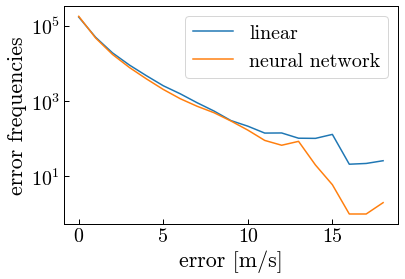

In [16]:
plt.plot(h_lin,label='linear')
plt.plot(h_nn,label='neural network')
plt.yscale('log')
plt.legend()
plt.ylabel('error frequencies')
plt.xlabel('error [m/s]')
plt.savefig('higherr_2.pdf',bbox_inches = 'tight')        

# Trajectory accuracy

In [17]:
with open('trajectories/AHTDr.pkl', 'rb') as f:
    AHTDr = pickle.load(f)
    
with open('trajectories/sigr.pkl', 'rb') as f:
    sigr = pickle.load(f)
    

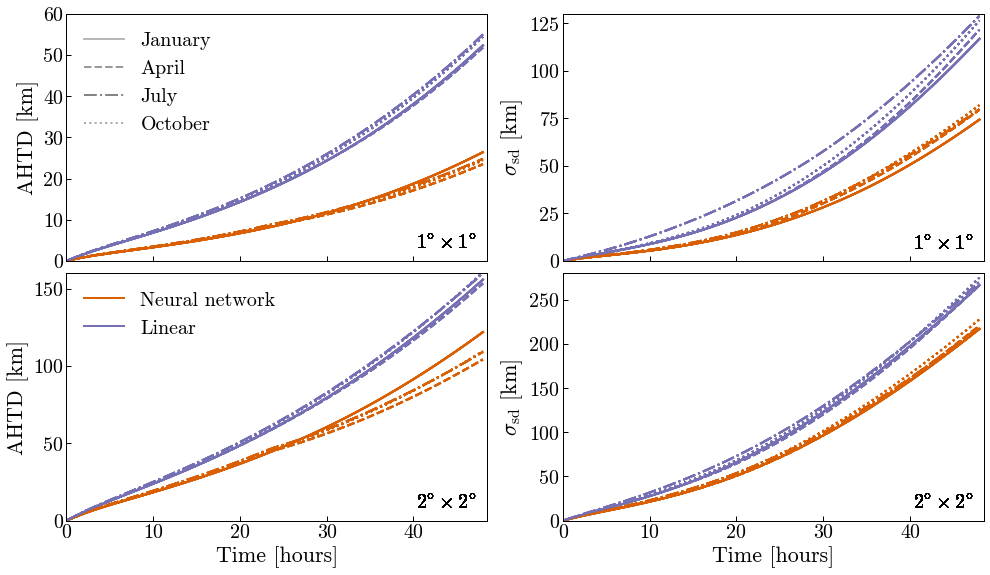

In [18]:
fig, ax = plt.subplots(2,2, figsize=[14,8],sharex=True)#,sharey='row')

nplots=4
basepaths=[0,1,2,3,4,5,6,7]
dirs=[0,1,2]
N=48*np.ones((8,3))
ls=['solid', 'dashed', 'dashdot', 'dotted' ]
colour=plt.cm.Dark2.colors
labels2=['January','April','July','October']

alph=1
alpha=np.ones(2*nplots)

cc=0

for i in range(1,2*nplots):
    alpha[i]=alph-(alph/6)
    alph=alph-(alph/6)
    alpha=alpha[::-1]
    linestemp=[]
    k=0
    
    for m in range(int(len(basepaths)/2)):
        i=m*2        
        for j in range(1, len(dirs)):
            ax[0,0].plot(np.arange(N[i][j]+1),AHTDr[i][j],ls=ls[m],color=colour[j],linewidth=2,alpha=alpha[k])
            ax[0,1].plot(np.arange(N[i][j]+1),sigr[i][j],ls=ls[m],color=colour[j],linewidth=2,alpha=alpha[k])

            if j==1:
                lab=labels2[m]
                
                linestemp.append(Line2D([0],[0],label=lab,color='k',alpha=alpha[k],ls=ls[m],lw=2))

            ax[1,0].plot(np.arange(N[i+1][j]+1),AHTDr[i+1][j],ls=ls[m],color=colour[j],linewidth=2,alpha=alpha[k])
            ax[1,1].plot(np.arange(N[i+1][j]+1),sigr[i+1][j],ls=ls[m],color=colour[j],linewidth=2,alpha=alpha[k])
            k+=1
            
            ax[1,0].set_xlabel('Time [hours]')
            ax[1,1].set_xlabel('Time [hours]')
            ax[0,0].set_ylim(bottom=0,top=60)
            ax[0,0].set_xlim(left=0,right=48.5)
            ax[0,1].set_ylim(bottom=0,top=130)
            ax[1,0].set_xlim(left=0,right=48.5)
            ax[1,0].set_ylim(bottom=0,top=160)
            ax[1,1].set_ylim(bottom=0,top=280)

        ax[0,0].set_ylabel('AHTD [km]')
        ax[1,0].set_ylabel('AHTD [km]')
        ax[0,0].text(40.3, 3, '$1^{\\circ} \\times 1^{\\circ}$')
        ax[0,1].text(40.3, 6, '$1^{\\circ} \\times 1^{\\circ}$')
        ax[1,0].text(40.3, 8, '$2^{\\circ} \\times 2^{\\circ}$')
        ax[1,1].text(40.3, 14, '$2^{\\circ} \\times 2^{\\circ}$')
        ax[0,1].set_ylabel('$\\sigma_{\\rm sd}$ [km]')
        ax[1,1].set_ylabel('$\\sigma_{\\rm sd}$ [km]')

        ax[0,0].legend(handles=[linestemp[i] for i in range(len(linestemp))],frameon=False,loc='upper left')
        line1 = Line2D([0],[0],label='Neural network',color=colour[1],lw=2)
        line2 = Line2D([0],[0],label='Linear',color=colour[2],lw=2)
        ax[1,0].legend(handles=[line1,line2],frameon=False,loc='upper left')
        
plt.subplots_adjust(top=0.98, bottom=0.1, left=0.08, right=0.99, wspace=0.18, hspace=0.05)